# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import requests
import time
from scipy.stats import linregress
import random

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=


In [4]:
# Create empty lists to append the API calls
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Initialize record to one
record = 1

In [5]:
# Start print statement 
print(f'Beginning of Data Retrieval\n-----------------------------------')

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    # Keep appending lists despite missing values
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        # Replace the spaces between city names that have more than one word
        city_name_record = city.replace(" ", "%20")
        
        # Print output
        print(f'Processing Record {record} | {city}')
        print(f'{query_url}{city_name_record}')
       
        # Increase record by one
        record = record + 1
        
        # Pause loop for one second
        time.sleep(1)
        
 
    # If city is not found, skip to the next     
    except:
        print("City not found. Skipping...")

Beginning of Data Retrieval
-----------------------------------
Processing Record 1 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=busselton
Processing Record 2 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=sitka
Processing Record 3 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=severo-kurilsk
Processing Record 4 | opochka
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=opochka
Processing Record 5 | vao
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=vao
Processing Record 6 | bonito
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=bonito
Processing Record 7 | raga
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe

Processing Record 57 | morada nova
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=morada%20nova
Processing Record 58 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=dikson
Processing Record 59 | omboue
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=omboue
Processing Record 60 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=puerto%20del%20rosario
Processing Record 61 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=barrow
Processing Record 62 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=ushuaia
Processing Record 63 | cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&

Processing Record 111 | ucluelet
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=ucluelet
Processing Record 112 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=torbay
Processing Record 113 | nome
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=nome
Processing Record 114 | ekibastuz
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=ekibastuz
Processing Record 115 | lom
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=lom
Processing Record 116 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=saint-philippe
Processing Record 117 | shenjiamen
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=

Processing Record 167 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=ilulissat
City not found. Skipping...
Processing Record 168 | havre
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=havre
Processing Record 169 | miyako
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=miyako
Processing Record 170 | bukowno
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=bukowno
Processing Record 171 | dhidhdhoo
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=dhidhdhoo
Processing Record 172 | kamina
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=kamina
Processing Record 173 | te anau
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de

Processing Record 222 | suluq
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=suluq
Processing Record 223 | kiruna
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=kiruna
City not found. Skipping...
Processing Record 224 | sola
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=sola
Processing Record 225 | nan
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=nan
Processing Record 226 | antofagasta
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=antofagasta
Processing Record 227 | san carlos de bariloche
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=san%20carlos%20de%20bariloche
Processing Record 228 | sudova vyshnya
http://api.openweathermap.org/data/2.5/weather?ap

Processing Record 277 | deyang
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=deyang
Processing Record 278 | zhigansk
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=zhigansk
Processing Record 279 | zambezi
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=zambezi
City not found. Skipping...
Processing Record 280 | el alto
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=el%20alto
Processing Record 281 | chumikan
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=chumikan
Processing Record 282 | madras
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=madras
Processing Record 283 | lasa
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6

Processing Record 331 | vega de alatorre
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=vega%20de%20alatorre
Processing Record 332 | puerto el triunfo
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=puerto%20el%20triunfo
Processing Record 333 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=souillac
City not found. Skipping...
Processing Record 334 | huanren
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=huanren
Processing Record 335 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=aklavik
Processing Record 336 | meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=meulaboh
Processing Record 337 | moletai
http://api.openweathermap.org/da

Processing Record 387 | cabo rojo
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=cabo%20rojo
Processing Record 388 | busayra
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=busayra
Processing Record 389 | lianzhou
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=lianzhou
Processing Record 390 | mitsamiouli
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=mitsamiouli
Processing Record 391 | muros
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=muros
Processing Record 392 | brokopondo
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=brokopondo
Processing Record 393 | parabel
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=

Processing Record 443 | kandrian
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=kandrian
Processing Record 444 | bilibino
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=bilibino
Processing Record 445 | tallahassee
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=tallahassee
City not found. Skipping...
Processing Record 446 | hun
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=hun
Processing Record 447 | havelock
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=havelock
Processing Record 448 | meadow lake
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=meadow%20lake
Processing Record 449 | new milford
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd

Processing Record 499 | nocera inferiore
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=nocera%20inferiore
City not found. Skipping...
Processing Record 500 | maridi
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=maridi
Processing Record 501 | vuktyl
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=vuktyl
Processing Record 502 | dakar
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=dakar
Processing Record 503 | ternate
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=ternate
Processing Record 504 | kirakira
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f9f131b9d6943de6fa&units=imperial&q=kirakira
Processing Record 505 | shimoda
http://api.openweathermap.org/data/2.5/weather?appid=6d9dbe4cd81d71f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictionary using the lists above 
cities_summary = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# Convert dictionary into a DataFrame
weather_data = pd.DataFrame(cities_summary)

# Count values 
weather_data.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [7]:
# Export DataFrame into a csv file
weather_data.to_csv("/Users/mignonduplessis/Documents/BootCampRep/Python_API_Challenge/WeatherPY/Data_CSV/weather_data.csv")


# Display DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,15,AU,1581358907,35,-33.65,115.33,64.00,15.79
1,Sitka,90,US,1581358908,93,57.05,-135.33,42.80,16.11
2,Severo-Kuril'sk,98,RU,1581358910,90,50.68,156.12,18.27,14.05
3,Opochka,100,RU,1581358911,92,56.71,28.66,39.18,11.86
4,Vao,100,NC,1581358673,84,-22.67,167.48,79.70,25.77


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

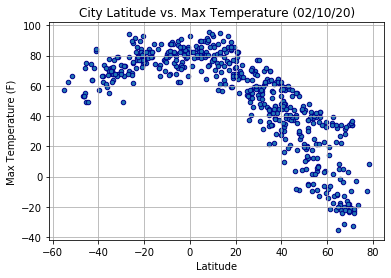

In [8]:

# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Max Temperature (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add grid
plt.grid()

# Save figure
plt.savefig("/Users/mignonduplessis/Documents/BootCampRep/Python_API_Challenge/WeatherPY/Plots/lat_temp.png")


# Display scatter plot
plt.show()

#### Latitude vs. Humidity Plot

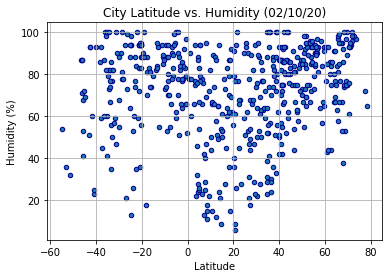

In [9]:
# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Humidity (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add grid
plt.grid()

# Save figure
plt.savefig("/Users/mignonduplessis/Documents/BootCampRep/Python_API_Challenge/WeatherPY/Plots/lat_humidity.png")

# Display scatter plot
plt.show()

#### Latitude vs. Cloudiness Plot

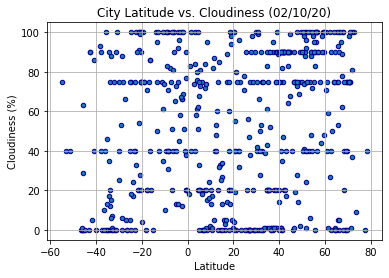

In [10]:
# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o",edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Cloudiness (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add grid
plt.grid()

# Save figure
plt.savefig("/Users/mignonduplessis/Documents/BootCampRep/Python_API_Challenge/WeatherPY/Plots/lat_cloudiness.png")

# Display scatter plot
plt.show()

#### Latitude vs. Wind Speed Plot

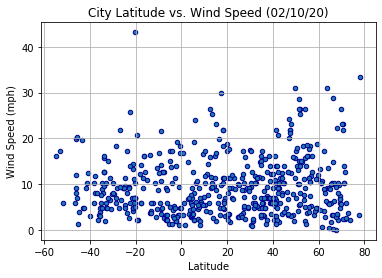

In [11]:
# Create a scatter plot based on weather_data DataFrame
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",edgecolors="darkblue", s=20)

# Set the title
plt.title(("City Latitude vs. Wind Speed (%s)" % time.strftime("%x")))

# Add axes labels 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add grid
plt.grid()

# Save figure
plt.savefig("/Users/mignonduplessis/Documents/BootCampRep/Python_API_Challenge/WeatherPY/Plots/lat_wind.png")

# Display scatter plot
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots


In [13]:
def gethemisphere(row):

    if row['Lat'] <=0:

        val = 'Southern'

    elif row['Lat'] > 0:

        val = 'Northern'

    return val

In [14]:
# Create Northern and Southern Hemisphere DataFrames
weather_data['Hemisphere'] = weather_data.apply(gethemisphere, axis=1)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,Busselton,15,AU,1581358907,35,-33.65,115.33,64.00,15.79,Southern
1,Sitka,90,US,1581358908,93,57.05,-135.33,42.80,16.11,Northern
2,Severo-Kuril'sk,98,RU,1581358910,90,50.68,156.12,18.27,14.05,Northern
3,Opochka,100,RU,1581358911,92,56.71,28.66,39.18,11.86,Northern
4,Vao,100,NC,1581358673,84,-22.67,167.48,79.70,25.77,Southern


In [15]:
northern_df = weather_data.loc[weather_data["Hemisphere"]== "Northern"]
northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
1,Sitka,90,US,1581358908,93,57.05,-135.33,42.80,16.11,Northern
2,Severo-Kuril'sk,98,RU,1581358910,90,50.68,156.12,18.27,14.05,Northern
3,Opochka,100,RU,1581358911,92,56.71,28.66,39.18,11.86,Northern
6,Raja,0,SS,1581358915,18,8.46,25.68,74.07,5.61,Northern
10,Middlebury,90,US,1581358920,100,44.02,-73.17,39.00,8.05,Northern


In [16]:
southern_df = weather_data.loc[weather_data["Hemisphere"]== "Southern"]
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,Busselton,15,AU,1581358907,35,-33.65,115.33,64.00,15.79,Southern
4,Vao,100,NC,1581358673,84,-22.67,167.48,79.70,25.77,Southern
5,Bonito,100,BR,1581358914,72,-21.12,-56.48,84.58,4.05,Southern
7,Bluff,0,NZ,1581358659,87,-46.60,168.33,53.01,5.99,Southern
8,Kokopo,100,PG,1581358917,78,-4.35,152.26,82.09,13.76,Southern


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.86970380184811


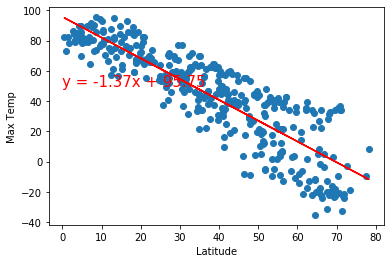

In [17]:
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.590621818410427


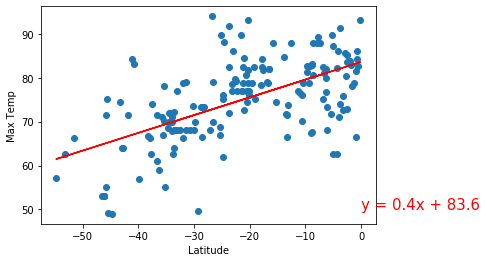

In [18]:
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4267125126208525


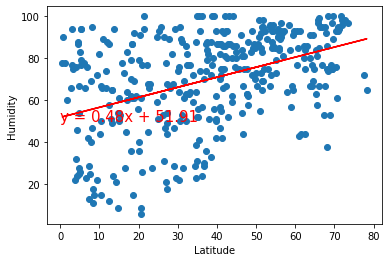

In [25]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.23445623303508856


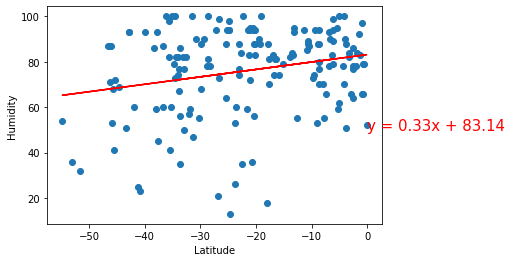

In [26]:
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24740902726496936


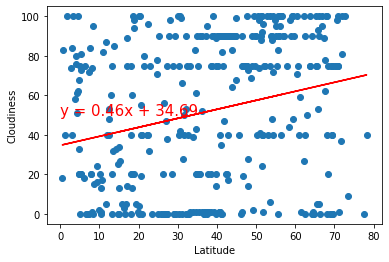

In [27]:
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3470718891246042


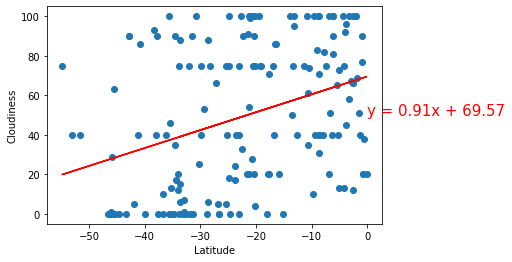

In [28]:
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10455991748888098


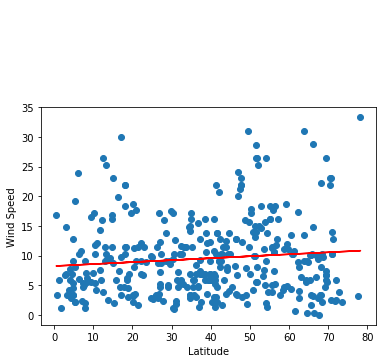

In [29]:
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0844043773644588


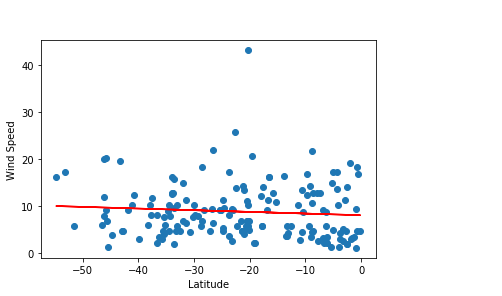

In [30]:
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
plt.show()

# Conclusion

When looking at all the graphs pulled up on Temperature, Cloudiness, Humidity and Wind Speed we can see that Temperatures are in strong correlation with the Latitude.

It is clear that the highest temperatures are found around the equater at zero dregrees latitude.Humidity increases in both the Southern and Northern Hemispheres the closer we get to the equater at zero degrees latitude. 

By looking at the graphs we can make a conclusion that Latitude does not have a impact on the Wind Speed or the Cloudiness on both the Northern and Southern Hemispheres.
